In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\sveda\OneDrive\Desktop\ml new project\exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# here our target is = "test preparation course" 
# Rest all will be treated as features.

# Univarient Analysis 


<Axes: xlabel='test preparation course', ylabel='count'>

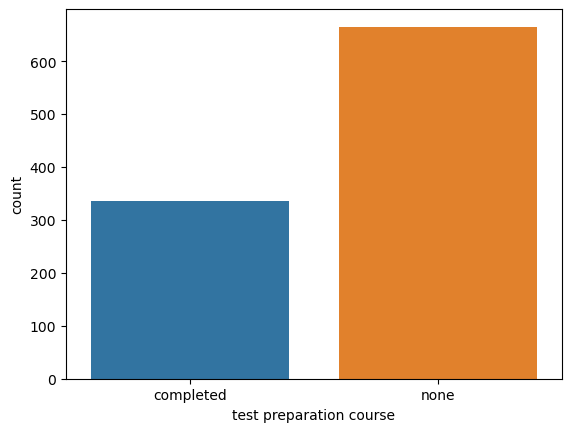

In [7]:
sns.countplot(data=df,x='test preparation course')

<Axes: xlabel='test preparation course', ylabel='count'>

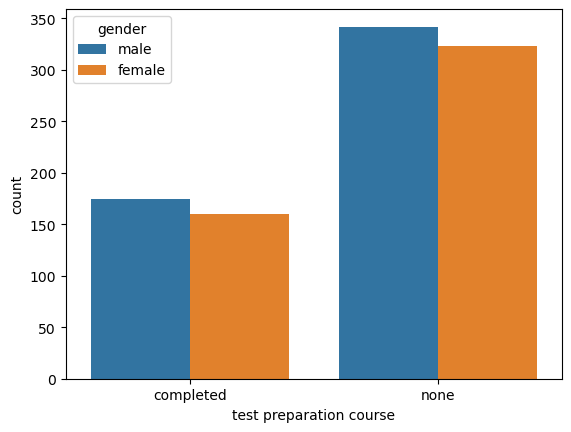

In [8]:
sns.countplot(data=df,x='test preparation course',hue='gender')

<Axes: xlabel='test preparation course', ylabel='count'>

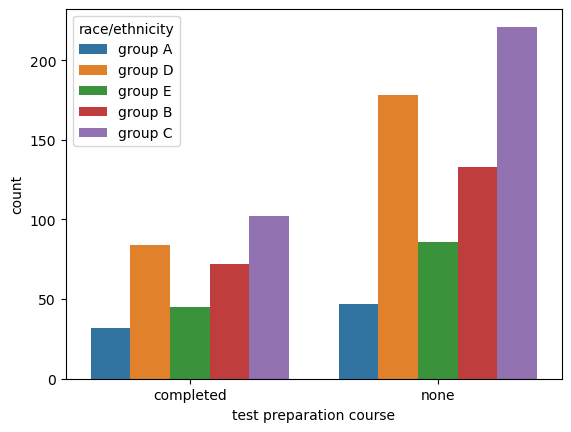

In [9]:
sns.countplot(data=df,x='test preparation course',hue='race/ethnicity')

<Axes: xlabel='test preparation course', ylabel='count'>

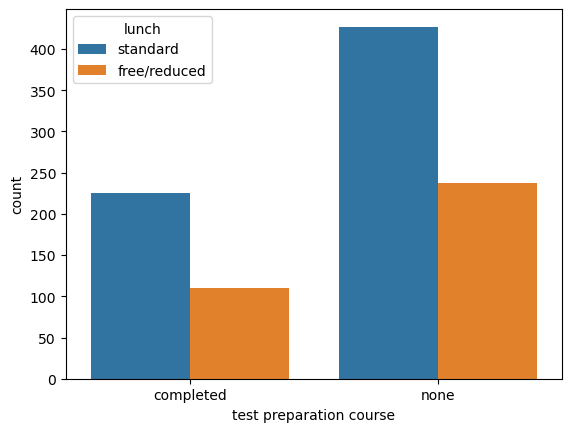

In [10]:
sns.countplot(data=df,x='test preparation course',hue='lunch')

In [11]:
# lets update NaN values

<Axes: xlabel='writing score', ylabel='lunch'>

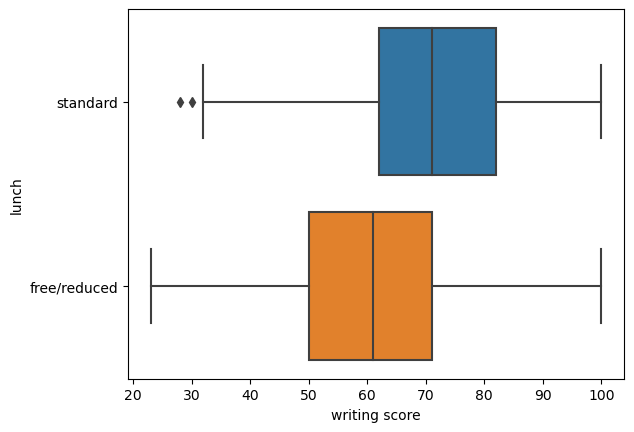

In [12]:
sns.boxplot(data=df,x='writing score',y='lunch')

In [13]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


<Axes: >

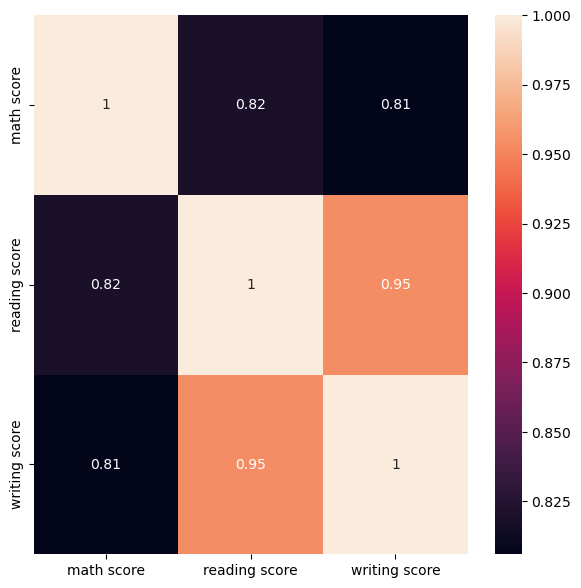

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

# we will Keep the Name column just to check the accuracy.

In [15]:
# lets check for outliers and remove the same 

In [16]:
Numcol = []
Catcol = []

for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        Catcol.append(x)
    else:
        Numcol.append(x)

In [17]:
Numcol

['math score', 'reading score', 'writing score']

In [18]:
Catcol

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[Catcol]=oe.fit_transform(df[Catcol])

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,0.0,67,67,63
1,0.0,3.0,5.0,0.0,1.0,40,59,55
2,1.0,4.0,4.0,0.0,1.0,59,60,50
3,1.0,1.0,2.0,1.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,0.0,78,73,68
...,...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,1.0,73,70,65
996,1.0,3.0,0.0,0.0,0.0,85,91,92
997,0.0,2.0,5.0,0.0,1.0,32,35,41
998,0.0,2.0,4.0,1.0,1.0,73,74,82


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   float64
 1   race/ethnicity               1000 non-null   float64
 2   parental level of education  1000 non-null   float64
 3   lunch                        1000 non-null   float64
 4   test preparation course      1000 non-null   float64
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 62.6 KB


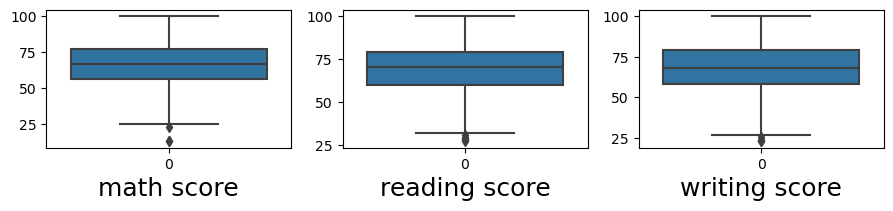

In [22]:
plt.figure(figsize=(12,12))
pltn=1

for i in Numcol:
    if pltn<=15:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1
plt.tight_layout()

In [23]:
x = df.drop("test preparation course",axis = 1)   # segrated all features from Target 
y = df['test preparation course'] 

In [24]:
x

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,67,67,63
1,0.0,3.0,5.0,0.0,40,59,55
2,1.0,4.0,4.0,0.0,59,60,50
3,1.0,1.0,2.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,78,73,68
...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,73,70,65
996,1.0,3.0,0.0,0.0,85,91,92
997,0.0,2.0,5.0,0.0,32,35,41
998,0.0,2.0,4.0,1.0,73,74,82


In [25]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    0.0
997    1.0
998    1.0
999    0.0
Name: test preparation course, Length: 1000, dtype: float64

In [26]:
# we don't need to perfom scaling here as we don't have -----

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
print(f"Confusion Matrix:{cm}\nClassification Report:{cr}\nAccuracy:{ac}")


Confusion Matrix:[[ 45  41]
 [ 23 191]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.66      0.52      0.58        86
         1.0       0.82      0.89      0.86       214

    accuracy                           0.79       300
   macro avg       0.74      0.71      0.72       300
weighted avg       0.78      0.79      0.78       300

Accuracy:0.7866666666666666


# The Accuracy of the Model = 78

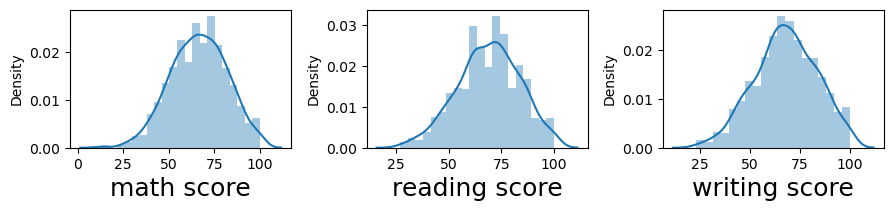

In [30]:
plt.figure(figsize=(12,12))
pltn=1

for i in Numcol:
    if pltn<=15:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1
plt.tight_layout()

In [31]:
from scipy.stats import zscore

In [32]:
z=np.abs(zscore(df[Numcol]))
new_data=df[(z<=3).all(axis=1)]

In [33]:
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,0.0,67,67,63
1,0.0,3.0,5.0,0.0,1.0,40,59,55
2,1.0,4.0,4.0,0.0,1.0,59,60,50
3,1.0,1.0,2.0,1.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,0.0,78,73,68
...,...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,1.0,73,70,65
996,1.0,3.0,0.0,0.0,0.0,85,91,92
997,0.0,2.0,5.0,0.0,1.0,32,35,41
998,0.0,2.0,4.0,1.0,1.0,73,74,82


In [34]:
new_data.shape

(998, 8)

In [35]:
df.shape

(1000, 8)

In [36]:
Dataloss=((1000-998)/1000)*100
Dataloss

0.2

In [37]:
new_data.skew()  #checking the skewness of the new data

gender                        -0.072300
race/ethnicity                -0.102148
parental level of education   -0.082648
lunch                         -0.645228
test preparation course       -0.697025
math score                    -0.091145
reading score                 -0.178214
writing score                 -0.139081
dtype: float64

<Axes: >

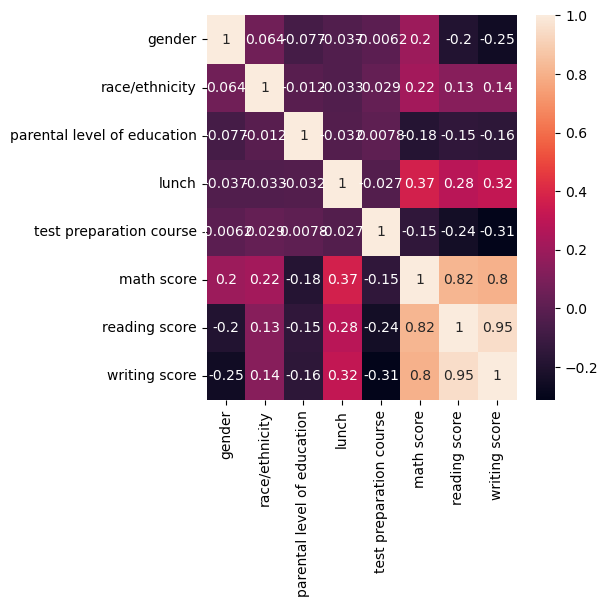

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(new_data.corr(),annot=True)

In [39]:
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,0.0,67,67,63
1,0.0,3.0,5.0,0.0,1.0,40,59,55
2,1.0,4.0,4.0,0.0,1.0,59,60,50
3,1.0,1.0,2.0,1.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,0.0,78,73,68
...,...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,1.0,73,70,65
996,1.0,3.0,0.0,0.0,0.0,85,91,92
997,0.0,2.0,5.0,0.0,1.0,32,35,41
998,0.0,2.0,4.0,1.0,1.0,73,74,82


In [40]:
x = new_data.drop("test preparation course",axis = 1)   # segrated all features from Target 
y = new_data['test preparation course']

In [41]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    0.0
997    1.0
998    1.0
999    0.0
Name: test preparation course, Length: 998, dtype: float64

In [42]:
x

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,67,67,63
1,0.0,3.0,5.0,0.0,40,59,55
2,1.0,4.0,4.0,0.0,59,60,50
3,1.0,1.0,2.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,78,73,68
...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,73,70,65
996,1.0,3.0,0.0,0.0,85,91,92
997,0.0,2.0,5.0,0.0,32,35,41
998,0.0,2.0,4.0,1.0,73,74,82


In [43]:
# we don't need to perfom scaling here as we don't have -----
# lets make the model

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression 

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

# Model Evaluation

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
print(f"Confusion Matrix:{cm}\nClassification Report:{cr}\nAccuracy:{ac}")


Confusion Matrix:[[ 50  49]
 [ 26 175]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57        99
         1.0       0.78      0.87      0.82       201

    accuracy                           0.75       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.74      0.75      0.74       300

Accuracy:0.75


# The Accuracy of the Model = 75% after removing the skewness

# lets check if the model is Underfitting / Underfitting

In [47]:
train = lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"Traning Score:{train}\nTest Score:{test}")

Traning Score:0.7492836676217765
Test Score:0.75


In [48]:
# Comparing this file with the previous one here Both test score 74 and train score = 74%

# lets try SVM on this data set and then check the Accuracy

In [49]:
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [50]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
print(f"Confusion Matrix:{cm}\nClassification Report:{cr}\nAccuracy:{ac}")


Confusion Matrix:[[ 50  49]
 [ 26 175]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57        99
         1.0       0.78      0.87      0.82       201

    accuracy                           0.75       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.74      0.75      0.74       300

Accuracy:0.75


# Using Hard Margin 

In [51]:
linsvc=LinearSVC(random_state=1)
linsvc.fit(xtrain,ytrain)
ypred=linsvc.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
train=linsvc.score(xtrain,ytrain)
test=linsvc.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

[[  8  91]
 [  1 200]]
              precision    recall  f1-score   support

         0.0       0.89      0.08      0.15        99
         1.0       0.69      1.00      0.81       201

    accuracy                           0.69       300
   macro avg       0.79      0.54      0.48       300
weighted avg       0.75      0.69      0.59       300

Training Score:0.670487106017192
Testing Score:0.6933333333333334


# Using Soft Margin

In [52]:
linsvc1=LinearSVC(random_state=1,C=0.8)
linsvc1.fit(xtrain,ytrain)
ypred=linsvc1.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
train=linsvc1.score(xtrain,ytrain)
test=linsvc1.score(xtest,ytest)
print(f"Traingin Score:{train}\nTesting Score:{test}")

[[  9  90]
 [  1 200]]
              precision    recall  f1-score   support

         0.0       0.90      0.09      0.17        99
         1.0       0.69      1.00      0.81       201

    accuracy                           0.70       300
   macro avg       0.79      0.54      0.49       300
weighted avg       0.76      0.70      0.60       300

Traingin Score:0.670487106017192
Testing Score:0.6966666666666667


# SVC with Kernal - Polynomial - Hard margin

In [53]:
from sklearn.svm import SVC

In [54]:
poly=SVC(random_state=1,kernel='poly',degree=2)
poly.fit(xtrain,ytrain)
ypred=poly.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

train=poly.score(xtrain,ytrain)
test=poly.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

[[ 11  88]
 [  6 195]]
              precision    recall  f1-score   support

         0.0       0.65      0.11      0.19        99
         1.0       0.69      0.97      0.81       201

    accuracy                           0.69       300
   macro avg       0.67      0.54      0.50       300
weighted avg       0.68      0.69      0.60       300

Training Score:0.6876790830945558
Testing Score:0.6866666666666666


# SVC with Kernel - polynomial soft margin

In [55]:
poly=SVC(random_state=1,kernel='poly',degree=2,C=0.8)
poly.fit(xtrain,ytrain)
ypred=poly.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

train=poly.score(xtrain,ytrain)
test=poly.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

[[  3  96]
 [  1 200]]
              precision    recall  f1-score   support

         0.0       0.75      0.03      0.06        99
         1.0       0.68      1.00      0.80       201

    accuracy                           0.68       300
   macro avg       0.71      0.51      0.43       300
weighted avg       0.70      0.68      0.56       300

Training Score:0.6747851002865329
Testing Score:0.6766666666666666


# SVC with Kernel - rbf = soft Margin

In [56]:
rbf=SVC(random_state=1,kernel='rbf',C=0.5)
rbf.fit(xtrain,ytrain)
ypred=rbf.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

train=rbf.score(xtrain,ytrain)
test=rbf.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

[[  0  99]
 [  0 201]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        99
         1.0       0.67      1.00      0.80       201

    accuracy                           0.67       300
   macro avg       0.34      0.50      0.40       300
weighted avg       0.45      0.67      0.54       300

Training Score:0.66189111747851
Testing Score:0.67


# SVC with Kernel - radical - Hard margin

In [57]:
rbf=SVC(random_state=1,kernel='rbf')
rbf.fit(xtrain,ytrain)
ypred=rbf.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

train=rbf.score(xtrain,ytrain)
test=rbf.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

[[  0  99]
 [  0 201]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        99
         1.0       0.67      1.00      0.80       201

    accuracy                           0.67       300
   macro avg       0.34      0.50      0.40       300
weighted avg       0.45      0.67      0.54       300

Training Score:0.66189111747851
Testing Score:0.67


In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [59]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# model1

In [60]:
#model 1 svr (kernel=linear)

svm= SVR(kernel='linear')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [61]:
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f'MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}')

MAE:0.34057681048687694
 MSE:0.17859688840297622
 RMSE:0.42260725076952504
 Accuracy:0.1922347878653271


# Model2

In [62]:
#svr kernel=poly

svm= SVR(kernel='poly')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f'MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}')

MAE:0.3270265639465402
 MSE:0.20063877331002036
 RMSE:0.4479271964393548
 Accuracy:0.09254286155576519


# DecisionTree Classifier 

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing accuracy{test}')

              precision    recall  f1-score   support

         0.0       0.52      0.57      0.54        99
         1.0       0.78      0.74      0.76       201

    accuracy                           0.68       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.69      0.68      0.69       300

Training accuracy:1.0
 Testing accuracy0.6833333333333333


In [65]:
#model 1 using max _depth
dtc=DecisionTreeClassifier(max_depth=9)
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing accuracy{test}')

              precision    recall  f1-score   support

         0.0       0.55      0.52      0.53        99
         1.0       0.77      0.79      0.78       201

    accuracy                           0.70       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.70      0.70      0.70       300

Training accuracy:0.8681948424068768
 Testing accuracy0.7


In [66]:
#model 2 using min_sample 
dtc=DecisionTreeClassifier(min_samples_leaf=7)
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing accuracy{test}')

              precision    recall  f1-score   support

         0.0       0.49      0.46      0.48        99
         1.0       0.74      0.77      0.75       201

    accuracy                           0.67       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.66      0.67      0.66       300

Training accuracy:0.8209169054441261
 Testing accuracy0.6666666666666666


In [67]:
#model 3 using both max_depth and min_sample_leaf
dtc=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10)
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing accuracy{test}')

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53        99
         1.0       0.77      0.75      0.76       201

    accuracy                           0.68       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.69      0.68      0.68       300

Training accuracy:0.7808022922636103
 Testing accuracy0.68


In [68]:
#model 4 using criterion ('entropy') max_depth and min_sample_leaf
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=10)
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing accuracy{test}')

              precision    recall  f1-score   support

         0.0       0.52      0.54      0.53        99
         1.0       0.77      0.76      0.76       201

    accuracy                           0.68       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.69      0.68      0.68       300

Training accuracy:0.7836676217765043
 Testing accuracy0.6833333333333333


In [69]:
#model 5
dtc=DecisionTreeClassifier(min_samples_leaf=23)
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
print(f'Training accuracy:{train}\n Testing accuracy{test}')

              precision    recall  f1-score   support

         0.0       0.62      0.55      0.58        99
         1.0       0.79      0.84      0.81       201

    accuracy                           0.74       300
   macro avg       0.70      0.69      0.70       300
weighted avg       0.73      0.74      0.74       300

Training accuracy:0.7550143266475645
 Testing accuracy0.74


# Random Forest

In [70]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [71]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1)
xsample,ysample=ros.fit_resample(xtrain,ytrain)

In [72]:
ysample.value_counts()

1.0    462
0.0    462
Name: test preparation course, dtype: int64

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xsample,ysample)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))
train=rf.score(xtrain,ytrain)
test=rf.score(xtest,ytest)
print(f'Training Score:{train}\n Testing Score{test}')

              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50        99
         1.0       0.75      0.77      0.76       201

    accuracy                           0.68       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.67      0.68      0.68       300

Training Score:1.0
 Testing Score0.6766666666666666


In [74]:
rf1=RandomForestClassifier(n_estimators=45,max_depth=2,max_features=8)
rf1.fit(xsample,ysample)
ypred=rf1.predict(xtest)
print(classification_report(ytest,ypred))
train=rf1.score(xtrain,ytrain)
test=rf1.score(xtest,ytest)
print(f'Training Score:{train}\n Testing Score{test}')

              precision    recall  f1-score   support

         0.0       0.43      0.72      0.54        99
         1.0       0.79      0.53      0.64       201

    accuracy                           0.59       300
   macro avg       0.61      0.62      0.59       300
weighted avg       0.67      0.59      0.60       300

Training Score:0.6074498567335244
 Testing Score0.5933333333333334


# KNN (K-Nearest Neighbor )

In [75]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [76]:
wcss

[690796.8927855713,
 281166.6700726174,
 172907.55009569656,
 129557.09917417304,
 109875.87411134056,
 97665.98613512667,
 87014.51484772876,
 77781.25980949757,
 70537.10711021144,
 64345.64093062714]

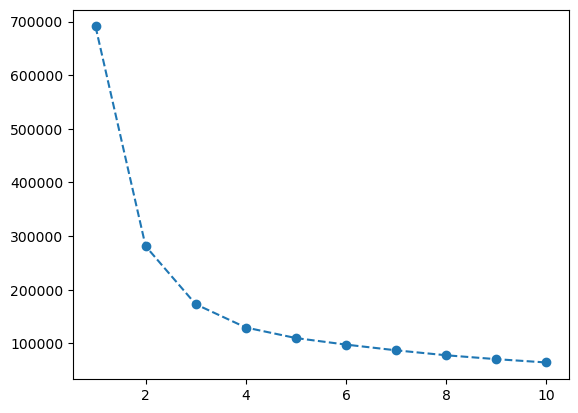

In [77]:
plt.plot(range(1,11),wcss,'o--')
plt.show()

In [78]:
kmeans=KMeans(n_clusters=5,random_state=1)
ylabel=kmeans.fit_predict(x)
ylabel

array([4, 0, 0, 3, 3, 4, 0, 1, 0, 2, 1, 1, 3, 3, 1, 4, 2, 0, 2, 2, 3, 0,
       4, 0, 2, 2, 0, 4, 1, 2, 3, 3, 2, 4, 1, 4, 4, 4, 4, 1, 4, 4, 3, 4,
       1, 0, 0, 3, 4, 0, 4, 0, 3, 2, 0, 0, 3, 1, 0, 0, 4, 0, 4, 3, 1, 4,
       4, 2, 4, 0, 4, 0, 0, 3, 4, 3, 0, 3, 3, 2, 0, 2, 0, 3, 2, 4, 4, 1,
       0, 3, 2, 4, 3, 1, 3, 4, 1, 2, 0, 0, 0, 3, 3, 4, 0, 3, 3, 2, 3, 2,
       1, 2, 4, 2, 3, 3, 0, 0, 4, 1, 4, 1, 0, 2, 3, 0, 4, 2, 1, 1, 3, 4,
       0, 0, 0, 3, 3, 0, 2, 4, 4, 3, 1, 0, 3, 0, 4, 0, 1, 2, 3, 0, 3, 4,
       0, 2, 4, 1, 1, 3, 1, 4, 1, 3, 4, 3, 4, 4, 1, 3, 0, 3, 4, 4, 3, 0,
       0, 0, 1, 1, 0, 2, 1, 3, 3, 1, 3, 0, 4, 0, 0, 2, 4, 1, 4, 2, 2, 0,
       0, 4, 0, 0, 4, 0, 3, 3, 3, 3, 3, 4, 4, 1, 4, 4, 3, 0, 4, 3, 4, 4,
       1, 4, 2, 3, 1, 3, 2, 4, 3, 1, 3, 3, 2, 3, 3, 1, 0, 1, 4, 3, 3, 3,
       4, 4, 2, 4, 2, 4, 0, 3, 4, 3, 4, 4, 0, 0, 3, 4, 4, 1, 4, 2, 0, 4,
       1, 4, 4, 3, 0, 4, 4, 4, 4, 1, 1, 3, 4, 3, 2, 4, 3, 1, 0, 2, 2, 3,
       1, 2, 4, 4, 3, 3, 4, 4, 0, 3, 2, 0, 0, 2, 2,

In [79]:
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,0.0,67,67,63
1,0.0,3.0,5.0,0.0,1.0,40,59,55
2,1.0,4.0,4.0,0.0,1.0,59,60,50
3,1.0,1.0,2.0,1.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,0.0,78,73,68
...,...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,1.0,73,70,65
996,1.0,3.0,0.0,0.0,0.0,85,91,92
997,0.0,2.0,5.0,0.0,1.0,32,35,41
998,0.0,2.0,4.0,1.0,1.0,73,74,82


In [80]:
new_data['ykmeans']=ylabel

In [81]:
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,ykmeans
0,1.0,0.0,2.0,1.0,0.0,67,67,63,4
1,0.0,3.0,5.0,0.0,1.0,40,59,55,0
2,1.0,4.0,4.0,0.0,1.0,59,60,50,0
3,1.0,1.0,2.0,1.0,1.0,77,78,68,3
4,1.0,4.0,0.0,1.0,0.0,78,73,68,3
...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,2.0,1.0,1.0,73,70,65,4
996,1.0,3.0,0.0,0.0,0.0,85,91,92,1
997,0.0,2.0,5.0,0.0,1.0,32,35,41,2
998,0.0,2.0,4.0,1.0,1.0,73,74,82,3


In [82]:
kmeans.cluster_centers_

array([[ 0.48623853,  2.00458716,  2.83027523,  0.54587156, 55.22477064,
        58.96788991, 57.04587156],
       [ 0.39726027,  2.60273973,  2.17808219,  0.88356164, 87.87671233,
        90.51369863, 90.80821918],
       [ 0.61290323,  1.92741935,  3.19354839,  0.33064516, 43.35483871,
        44.40322581, 42.15322581],
       [ 0.53112033,  2.1659751 ,  2.34024896,  0.77178423, 76.21161826,
        78.70954357, 78.05809129],
       [ 0.55390335,  2.14869888,  2.47583643,  0.65799257, 66.01486989,
        68.37174721, 66.71003717]])

In [83]:
new_data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,ykmeans
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.518036,2.160321,2.566132,0.653307,0.664329,66.503006,69.075150,67.813627,2.197395
std,0.499925,1.133226,1.811901,0.476156,0.472461,15.231332,14.660154,15.521536,1.517571
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,27.000000,23.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,56.000000,60.000000,58.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000,67.000000,70.000000,68.000000,3.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000,4.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000,4.000000


In [84]:
new_data[new_data.ykmeans==0].describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,ykmeans
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,0.486239,2.004587,2.830275,0.545872,0.738532,55.224771,58.967890,57.045872,0.0
std,0.500961,1.071188,1.850047,0.499037,0.440446,6.557082,5.019214,5.713409,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,44.000000,43.000000,0.0
25%,0.000000,1.000000,1.000000,0.000000,0.000000,51.000000,55.250000,53.000000,0.0
50%,0.000000,2.000000,3.000000,1.000000,1.000000,55.000000,59.000000,57.000000,0.0
75%,1.000000,3.000000,4.750000,1.000000,1.000000,60.000000,62.750000,61.000000,0.0
max,1.000000,4.000000,5.000000,1.000000,1.000000,73.000000,72.000000,71.000000,0.0


In [85]:
new_data[new_data.ykmeans==1].describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,ykmeans
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0
mean,0.397260,2.602740,2.178082,0.883562,0.458904,87.876712,90.513699,90.808219,1.0
std,0.491015,1.165477,1.712771,0.321854,0.500024,7.228192,5.515166,5.651140,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,80.000000,77.000000,1.0
25%,0.000000,2.000000,1.000000,1.000000,0.000000,83.000000,87.000000,87.000000,1.0
50%,0.000000,3.000000,2.000000,1.000000,0.000000,87.500000,89.000000,90.000000,1.0
75%,1.000000,3.000000,4.000000,1.000000,1.000000,93.000000,95.000000,95.000000,1.0
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000,1.0


In [86]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
from sklearn.metrics import classification_report 
def mymodel(model):
    model.fit(xtrain,ytrain)
    
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training score:{train}\nTesting score:{test}")
    print(classification_report(ytest,ypred))
    return model

In [88]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.multiclass import OneVsRestClassifier

In [89]:
mnb=mymodel( MultinomialNB())

Training score:0.6819484240687679
Testing score:0.69
              precision    recall  f1-score   support

         0.0       0.71      0.10      0.18        99
         1.0       0.69      0.98      0.81       201

    accuracy                           0.69       300
   macro avg       0.70      0.54      0.49       300
weighted avg       0.70      0.69      0.60       300



In [90]:
bnb=mymodel(BernoulliNB())

Training score:0.66189111747851
Testing score:0.67
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        99
         1.0       0.67      1.00      0.80       201

    accuracy                           0.67       300
   macro avg       0.34      0.50      0.40       300
weighted avg       0.45      0.67      0.54       300



In [91]:
gnb=mymodel(GaussianNB())

Training score:0.6489971346704871
Testing score:0.6766666666666666
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49        99
         1.0       0.75      0.78      0.76       201

    accuracy                           0.68       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.67      0.68      0.67       300



In [92]:
logreg=mymodel(LogisticRegression())

Training score:0.7492836676217765
Testing score:0.75
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57        99
         1.0       0.78      0.87      0.82       201

    accuracy                           0.75       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.74      0.75      0.74       300



In [93]:
logreg1=mymodel(LogisticRegression(multi_class='ovr'))

Training score:0.7492836676217765
Testing score:0.75
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57        99
         1.0       0.78      0.87      0.82       201

    accuracy                           0.75       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.74      0.75      0.74       300



In [94]:
ovr=mymodel(OneVsRestClassifier(LogisticRegression()))

Training score:0.7492836676217765
Testing score:0.75
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57        99
         1.0       0.78      0.87      0.82       201

    accuracy                           0.75       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.74      0.75      0.74       300



In [95]:
ovr=mymodel(OneVsRestClassifier(MultinomialNB()))

Training score:0.6819484240687679
Testing score:0.69
              precision    recall  f1-score   support

         0.0       0.71      0.10      0.18        99
         1.0       0.69      0.98      0.81       201

    accuracy                           0.69       300
   macro avg       0.70      0.54      0.49       300
weighted avg       0.70      0.69      0.60       300



In [96]:
#here we import hierarchy 

from scipy.cluster import hierarchy as hi 

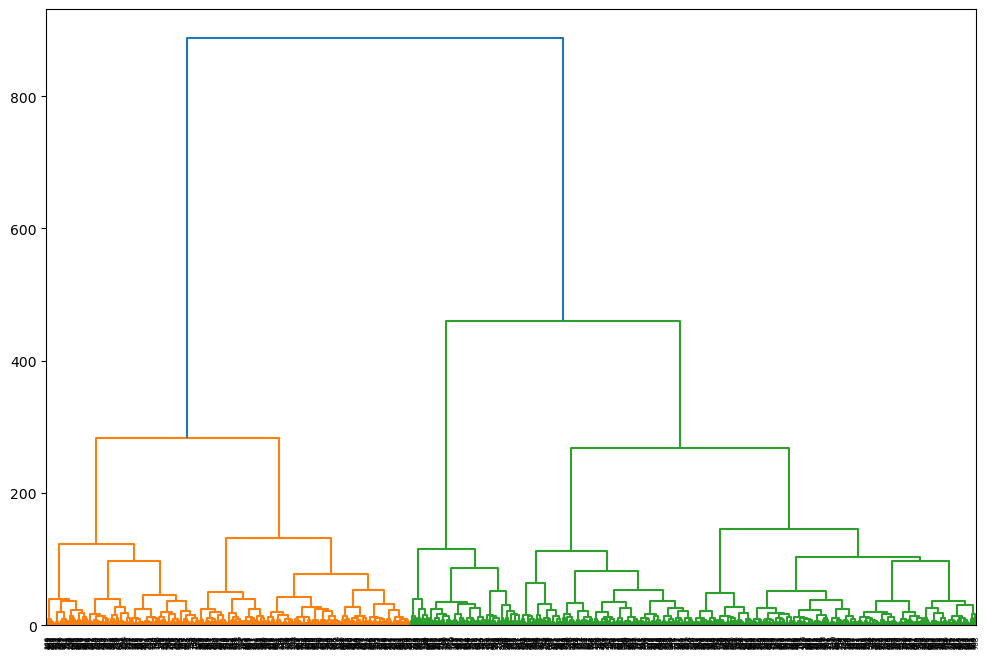

In [97]:
plt.figure(figsize=(12,8))
lk=hi.linkage(x,method='ward')
ddg=hi.dendrogram(lk)

In [98]:
#plt.scatter(x[:,0],x[:,1],c=ylabel,s=100,cmap='rainbow')
#plt.xlabel("math score")
#plt.ylabel("lunch")
#plt.show()

In [99]:
#here we have imported KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [100]:
kngb1=mymodel(KNeighborsClassifier(n_neighbors=12))

Training score:0.7234957020057307
Testing score:0.7166666666666667
              precision    recall  f1-score   support

         0.0       0.59      0.48      0.53        99
         1.0       0.77      0.83      0.80       201

    accuracy                           0.72       300
   macro avg       0.68      0.66      0.66       300
weighted avg       0.71      0.72      0.71       300

